## Bank Note Authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. 
For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. 
Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. 
Wavelet Transform tool were used to extract features from images.

In [2]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("BankNote_Authentication.csv")

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Data Understanding 

In [5]:
df.shape

(1372, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


<AxesSubplot:xlabel='variance', ylabel='Density'>

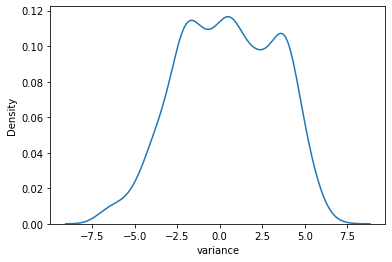

In [8]:
# variance 
sns.kdeplot(df['variance'])

C:\Users\Rohit Bhapkar\anaconda3\envs\banknote\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='variance'>

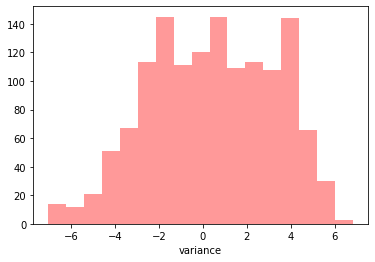

In [9]:
sns.distplot(a=df.variance, color='red', kde=False)

<AxesSubplot:xlabel='variance', ylabel='skewness'>

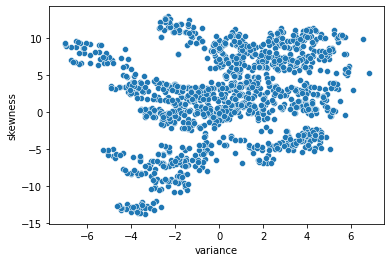

In [10]:
sns.scatterplot(x='variance',y='skewness', data=df)

<AxesSubplot:xlabel='variance', ylabel='curtosis'>

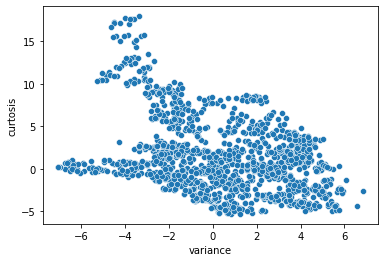

In [11]:
sns.scatterplot(x='variance', y="curtosis", data=df)

<AxesSubplot:xlabel='skewness', ylabel='Density'>

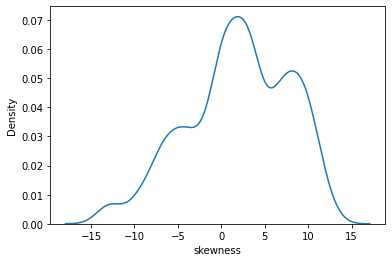

In [12]:
#skewness
sns.kdeplot(df['skewness'])

C:\Users\Rohit Bhapkar\anaconda3\envs\banknote\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

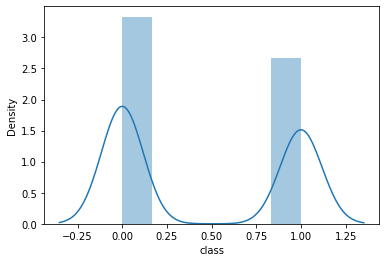

In [13]:
# class
sns.distplot(df['class'])

# Model Building

In [14]:
backup =df 
backup.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [15]:
### Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [17]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
## Prediction
y_pred=classifier.predict(X_test)

In [19]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [20]:
print("Accuracy Score : ",score)

Accuracy Score :  0.9878640776699029


# Import a Pickle File

In [21]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [22]:
classifier.predict([[2,3,4,1]])

array([0], dtype=int64)

In [24]:
# save the model to disk
file = 'finalized_model.sav'
pickle.dump(classifier, open(file, 'wb'))
 

In [25]:
import ctypes
print (ctypes.sizeof(ctypes.c_voidp))

8


In [26]:
!pip install pandas